<a href="https://colab.research.google.com/github/carlocamilloni/Structural-Bioinformatics/blob/main/StructurePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK2: Protein Structure Prediction

In [64]:
#Install conda using the new conda-colab library
!pip install -q condacolab
import condacolab
condacolab.install_miniconda()

✨🍰✨ Everything looks OK!


In this notebook you will try to characterize one protein from its sequence using multiple tools. In particular we will work on proteins from Salmonella Arizonae that is a Gram Negative bacterium. We will perform

1.   Secondary Structure prediction
2.   Homology modelling
3.   Coevolution analysis
4.   Ab initio structure prediction

You should write a report including the obtained results also using what you learned about structure visualisation using VMD.




As for the last time, link your google drive, create a folder for this second task and save a copy of this notebook there


Then move to your local folder:

In [43]:
local_path='/content/drive/MyDrive/Task2'   # PASTE YOUR LOCAL PATH IN PLACE OF /content
%cd {local_path}

/content/drive/MyDrive/Task2


Now you can choose one among these sequences on which you will work. To choose it set the seq variable in the following:

*   A9MHP5: Beta-barrel assembly-enhancing protease
*   A9MI44: Uncharacterized protein
*   A9MJ84: Uncharacterized protein
*   A9MG92: ABC transmembrane type-1 domain-containing protein



In [44]:
seq='XXXX.fasta'

In [3]:
#get the sequence you choose as:
!wget https://www.uniprot.org/uniprot/{seq}

--2021-10-25 14:43:18--  https://www.uniprot.org/uniprot/A9MHP5.fasta
Resolving www.uniprot.org (www.uniprot.org)... 193.62.193.81
Connecting to www.uniprot.org (www.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 679 [text/plain]
Saving to: ‘A9MHP5.fasta’

A9MHP5.fasta        100%[===================>]     679  --.-KB/s    in 0s      

2021-10-25 14:43:19 (58.5 MB/s) - ‘A9MHP5.fasta’ saved [679/679]



In [4]:
#Installing biopython using pip
!pip install biopython

     |████████████████████████████████| 2.3 MB 29.6 MB/s 


Biopython is an excellent companion for working with DNA and protein sequences and also with structures. Here, we will show how to use it for reading a protein sequence file.


In [5]:
import os
from pathlib import Path 
from Bio import SeqIO, Entrez
aaseq = SeqIO.read(seq, format="fasta")

What is great about SeqIO is that you can use it to manipulate your sequence (e.g. sorting, changing formats, etc) and also to print information about your sequence, such as its description, sequence and accession ID.
You can try these commands below by first writing "aaseq." and then selecting one of the autocomplete options suggested by Google Colab. With this information, try to obtain the information requested below.

In [6]:
#Printing the number of amino acids as an example
print("Sequence length (aa):")
print(len(aaseq))

Sequence length (aa):
512


In [7]:
#Printing the description of the sequence
print("The description of the sequence is:")
#INSERT YOUR OWN COMMAND BELOW (aaseq.xxx)
print()

#Printing the accession ID of the sequence
print("The ID of the sequence is:")
#INSERT YOUR OWN COMMAND BELOW
print()

#Printing the sequence
print("The sequence is:")
#INSERT YOUR OWN COMMAND BELOW
print()

The description of the sequence is:

The ID of the sequence is:

The sequence is:



Now we can begin with a secondary structure prediction from the sequence. For this we will use S4PRED (https://github.com/psipred/s4pred)

In [8]:
%cd {local_path}

/content/drive/MyDrive/Task2


In [9]:
# we need to download and install it
!git clone --depth 1 https://github.com/psipred/s4pred
%cd s4pred
%mkdir weights
%cd weights
!wget http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights_1.pt
!wget http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights_2.pt
!wget http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights_3.pt
!wget http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights_4.pt
!wget http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights_5.pt

Cloning into 's4pred'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15 (delta 0), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.
/content/drive/My Drive/Task2/s4pred
/content/drive/My Drive/Task2/s4pred/weights
--2021-10-25 14:43:43--  http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights_1.pt
Resolving bioinfadmin.cs.ucl.ac.uk (bioinfadmin.cs.ucl.ac.uk)... 128.16.10.201
Connecting to bioinfadmin.cs.ucl.ac.uk (bioinfadmin.cs.ucl.ac.uk)|128.16.10.201|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89748500 (86M)
Saving to: ‘weights_1.pt’

weights_1.pt        100%[===================>]  85.59M  26.9MB/s    in 3.6s    

2021-10-25 14:43:47 (23.7 MB/s) - ‘weights_1.pt’ saved [89748500/89748500]

--2021-10-25 14:43:47--  http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights_2.pt
Resolving bioinfadmin.cs.ucl.ac.uk (bioinfadmin.cs.uc

In [10]:
# Install: PyTorch
# this can be long..
!pip install torch==1.5.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4 MB 953 bytes/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu111 requires torch==1.9.0, but you have torch 1.5.1+cu101 which is incompatible.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.5.1+cu101 which is incompatible.


Now we can run the prediction over our fasta sequence and save it in a text file. You can then double click on the file to see the results

In [18]:
%cd {local_path}
!python s4pred/run_model.py {seq} > ss.{seq}.txt
%ls ss.{seq}.txt

/content/drive/MyDrive/Task2
ss.A9MHP5.fasta.txt


The file is made of three columns that report the secondary structure prediction and are COIL/HELIX/EXTENDED, we can now load and plot the results

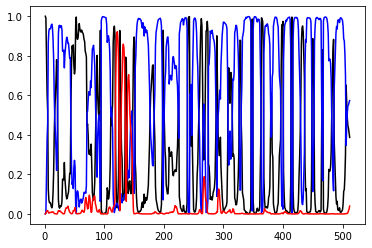

In [19]:
import pandas as pd
# here we are giving the titles to the columns of the file
header_list = ["position", "sequence", "ss", "coil", "helix","extended"]
# here we are reading the file skipping the first two lines
# you need to set your path to your file
data = pd.read_csv('/content/drive/MyDrive/Task2/ss.A9MHP5.fasta.txt',sep='\s+',skiprows=2,names=header_list)
data = pd.DataFrame(data)

import matplotlib.pyplot as plt
#we are generating three plots calling each column with its name
#and setting the properties of the plot (e.g. the color of the line)
plt.plot(data['position'], data['coil'], color='black')
plt.plot(data['position'], data['helix'], color='blue')
plt.plot(data['position'], data['extended'], color='red')
#show the plot now
plt.show()

you can check how to improve the plot looking for matplotlib plot example. This plot can be used to describe what the secondary structure of the protein can be

#HOMOLOGY MODELLING USING MODELER

Then, we must install several pieces of software to perform this tutorial. Namely:
- **MODELLER**, a famous software for template-based modelling.
- **py3Dmol**, for visualization of the template and modelled protein structures.
- **biopython**, for manipulation and retrieval of protein structures and sequences.

After several tests, the following installation instructions are the best way of setting up **Google Colab** for this laboratory session.

1. We will first install MODELLER as follows:

⚠️**WARNING!:** In order to use MODELLER, you will need to obtain an Academic License by registering **[in this website](https://salilab.org/modeller/registration.html)**. The license key will be immediately sent to your email address.

In [1]:
#ADD YOUR LICENSE KEY HERE!
%env KEY_MODELLER=MODELIRANJE

env: KEY_MODELLER=MODELIRANJE


In [2]:
!conda config --add channels salilab
!conda install modeller

Solving environment: / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - modeller


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.9.30  |       h06a4308_1         116 KB
    certifi-2021.10.8          |   py37h06a4308_0         151 KB
    conda-4.10.3               |   py37h06a4308_0         2.9 MB
    hdf5-1106-1.10.6           |                0         3.0 MB  salilab
    modeller-10.1              |   py37h9bf148f_1        16.7 MB  salilab
    openssl-1.1.1l             |       h7f8727e_0         2.5 MB
    ------------------------------------------------------------
                                           Total:        25.3 MB

The following NEW packages will be INSTALLED:

  hdf5-1106          salilab/linux-64::hdf5-1106-1.10.6-0
  modeller           salilab/linux-64::modeller-10.1-py37h9bf148f_1

In [3]:
#Installing py3Dmol using pip
!pip install py3Dmol
#And importing the py3Dmol module
import py3Dmol

In [7]:
%cd {local_path}
%mkdir homology
%cd homology

/content/drive/MyDrive/Task2
/content/drive/MyDrive/Task2/homology


In [8]:
#Downloading pdb_95.pir
!wget https://salilab.org/modeller/downloads/pdb_95.pir.gz
!gunzip pdb_95.pir.gz
#Downloading the build_profile.py script from GitHub
!wget https://raw.githubusercontent.com/pb3lab/ibm3202/master/scripts/build_profile.py

--2021-10-25 14:58:35--  https://salilab.org/modeller/downloads/pdb_95.pir.gz
Resolving salilab.org (salilab.org)... 169.230.79.19
Connecting to salilab.org (salilab.org)|169.230.79.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17047044 (16M) [application/x-gzip]
Saving to: ‘pdb_95.pir.gz’

pdb_95.pir.gz       100%[===================>]  16.26M  17.2MB/s    in 0.9s    

2021-10-25 14:58:36 (17.2 MB/s) - ‘pdb_95.pir.gz’ saved [17047044/17047044]

--2021-10-25 14:58:37--  https://raw.githubusercontent.com/pb3lab/ibm3202/master/scripts/build_profile.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1321 (1.3K) [text/plain]
Saving to: ‘build_profile.py’

build_profile.py    100%[===================>]   1.29K  --.-KB/s    in 0s    

In [11]:
#copy the fasta file
%cp ../{seq} target.fasta
#Running the build_profile script
!mod10.1 build_profile.py
#Printing only the list of potential templates
!sed -n '/HITS FOUND IN ITERATION:     1/,/Weight Matrix/p;/Weight Matrix/q' build_profile.log

'import site' failed; use -v for traceback
HITS FOUND IN ITERATION:     1


Dynamically allocated memory at     amaxprofile [B,KiB,MiB]:      1326237    1295.153     1.265
> 6sarA                      1   39316   89700     392     512   91.84     0.0           2   392    69   509     1   392
> 5xi8A                      1   39843   39100     175     512   89.60     0.0           3   173   335   507     3   175
> 6aitA                      1   45928   96700     418     512   92.11     0.0           4   418    70   507     1   418
> 6aitF                      1   45929   92150     406     512   92.36     0.0           5   406    70   506     1   406
> 3c37A                      1   59598   15550     223     512   34.85     0.0           6   198    69   290     6   203

profile_iteration__> Weight Matrix           [sec]:     0.010000


As a result you should see something like
> 6sarA                      1   39316   

this is > pdbCHAIN and properties.
**The important columns to determine the best templates from this analysis are the fifth, seventh and eight columns, which correspond to the sequence length of the target protein, the sequence identity and the e-value, respectively.**

In this particular example, a BLOSUM62 similarity matrix is being used for determining the sequence identity between target and potential templates. Also, we are employing only one search iteration and the parameter max_aln_evalue is set to 0.01, indicating that only sequences with e-values smaller than or equal to 0.01 will be included in the final profile.

For simplicity, we just printed out the PDB table from the resulting log file generated during this analysis.
As you can see, several PDB files are indicated.

QUESTION: From this analysis, which template would be better for modeling the structure of our target sequence?

We will choose five PDB structures based on the sequence identity and e-value and select the most appropriate template for our target sequence among them. For this, we will first download these structures using the Bio.PDB command from biopython, and then use the alignment.compare_structures() command to assess the structural and sequence similarity between the possible templates through the compare.py script.
Please take a few minutes to examine the content of this script, particularly i) how are the different protein structures included within the script; and ii) which chain is being used from each structure. This is important for cases where only one of many chains in the PDB corresponds to the protein. Also, please note that there are two alignment steps: first, a sequence alignment; second, a structural alignment.

In [13]:
import os
#Downloading the PDB files using biopython
from Bio.PDB import *
#add here the list of PDB codes above (4 or 5) withouth chain
templates = ['6sar','5xi8','6ait','3c37']
pdbl = PDBList()
for s in templates:
  pdbl.retrieve_pdb_file(s, pdir='.', file_format ="pdb", overwrite=True)
  os.rename("pdb"+s+".ent", s+".pdb")

In [74]:
#Downloading the build_profile.py script from GitHub
!wget https://raw.githubusercontent.com/pb3lab/ibm3202/master/scripts/compare.py
#Check this script and change the names of the PDB files if required

--2021-10-25 13:08:43--  https://raw.githubusercontent.com/pb3lab/ibm3202/master/scripts/compare.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 469 [text/plain]
Saving to: ‘compare.py’

compare.py          100%[===================>]     469  --.-KB/s    in 0s      

2021-10-25 13:08:43 (18.3 MB/s) - ‘compare.py’ saved [469/469]



In [15]:
from modeller import *

env = environ()
aln = alignment(env)
for (pdb, chain) in (('6sar', 'A'), ('5xi8', 'A'), ('6ait', 'A'),
                     ('6ait', 'F'), ('3c37', 'A'),):
    m = model(env, file=pdb, model_segment=('FIRST:'+chain, 'LAST:'+chain))
    aln.append_model(m, atom_files=pdb, align_codes=pdb+chain)
aln.malign()
aln.malign3d()
aln.compare_structures()
aln.id_table(matrix_file='family.mat')
env.dendrogram(matrix_file='family.mat', cluster_cut=-1.0)

environ____W> The class 'environ' is deprecated; use 'Environ' instead
alignment__W> The class 'alignment' is deprecated; use 'Alignment' instead
model______W> The class 'model' is deprecated; use 'Model' instead
model______W> The class 'model' is deprecated; use 'Model' instead
model______W> The class 'model' is deprecated; use 'Model' instead
model______W> The class 'model' is deprecated; use 'Model' instead
model______W> The class 'model' is deprecated; use 'Model' instead

Multiple dynamic programming alignment (MALIGN):
  Residue-residue metric  : $(LIB)/as1.sim.mat
  ALIGN_BLOCK             :            1
  Gap introduction penalty:    -900.0000
  Gap extension penalty   :     -50.0000
  Length of alignment     :          426
# Sequence alignment of the structurally conserved regions
# [average distance and standard deviation are with respect
#  to the framework (i.e., average structure)]
#
#  N av ds st dv   6sarA  5xi8A  6aitA  6aitF  3c37A  
# =================================

Towards the end you should see something about
**Sequence identity comparison (ID_TABLE):**. This table report about the similarity among the templates. This allows you to understand wheter the suggested templates are redundant or not. The number @xx is the resolution of the experimental structure. In practice one would like the highest coverage, highest sequence similarity and best resolution.

Now, we will align the sequence of our template protein with the sequence of our target protein, such that we can model the structure.
How hard is it? Not at all! Just download the align2d.py script into your working folder, check the script to verify how the sequence of the target and the protein structure are evoked, and execute the script as we have done before

In [24]:
%cd {local_path}/homology
from modeller import *

env = environ()
aln = alignment(env)
# pdb file and FIRST:CHAIN, LAST:CHAIN this is important for multi-chains
mdl = model(env, file='6ait', model_segment=('FIRST:A','LAST:A'))
aln.append_model(mdl, align_codes='6aitA', atom_files='6ait.pdb')
aln.append(file='target.fasta', align_codes='tr|A9MHP5|A9MHP5_SALAR', alignment_format='FASTA')
aln.align2d()
aln.write(file='aligned.fasta', alignment_format='FASTA')
aln.write(file='aligned.ali', alignment_format='PIR')
aln.write(file='aligned.pap', alignment_format='PAP')

/content/drive/MyDrive/Task2/homology
environ____W> The class 'environ' is deprecated; use 'Environ' instead
alignment__W> The class 'alignment' is deprecated; use 'Alignment' instead
model______W> The class 'model' is deprecated; use 'Model' instead
mkapsa__637W> No residue topology library is in memory.
              Better radii would be used if topology.read() is called first.
iup2crm_280W> No topology library in memory or assigning a BLK residue.
              Default CHARMM atom type assigned:  N -->  N
              This message is written only for the first such atom.

Pairwise dynamic programming alignment (ALIGN2D):
  Residue-residue metric   : $(LIB)/as1.sim.mat
  Diagonal                 :          100
  Overhang                 :            0
  Maximal gap length       :       999999
  Local alignment          :            F
  MATRIX_OFFSET (local aln):       0.0000
  FIX_OFFSETS              :      0.0    -1.0    -2.0    -3.0    -4.0
  N_SUBOPT                 :          

You will end up with two new files (aligned.ali and aligned.fasta) that contain the pairwise alignment of the target and template sequences. Load the FASTA file into Alignment Viewer 2.0. You can also use our Colab-mounted MSA viewer below:

In [25]:
#@title Protein MSA Viewer in Google Colab
#The following code is modified from the wonderful viewer developed by Damien Farrell
#https://dmnfarrell.github.io/bioinformatics/bokeh-sequence-aligner

#Importing all modules first
import os, io, random
import string
import numpy as np

from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio import AlignIO, SeqIO

import panel as pn
import panel.widgets as pnw
pn.extension()

from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot

#Setting up the amino color code according to Zappo color scheme
def get_colors(seqs):
    #make colors for bases in sequence
    text = [i for s in list(seqs) for i in s]
    #Use Zappo color scheme
    clrs =  {'K':'red',
             'R':'red',
             'H':'red',             
             'D':'green',
             'E':'green',
             'Q':'blue',
             'N':'blue',
             'S':'blue',
             'T':'blue',
             'A':'blue',
             'I':'blue',
             'L':'blue',
             'M':'blue',
             'V':'blue',
             'F':'orange',
             'Y':'orange',
             'W':'orange',
             'C':'blue',
             'P':'yellow',
             'G':'orange',
             '-':'white'}
    colors = [clrs[i] for i in text]
    return colors

#Setting up the MSA viewer
def view_alignment(aln, fontsize="9pt", plot_width=800):
    """Bokeh sequence alignment view"""

    #make sequence and id lists from the aln object
    seqs = [rec.seq for rec in (aln)]
    ids = [rec.id for rec in aln]    
    text = [i for s in list(seqs) for i in s]
    colors = get_colors(seqs)    
    N = len(seqs[0])
    S = len(seqs)    
    width = .4

    x = np.arange(1,N+1)
    y = np.arange(0,S,1)
    #creates a 2D grid of coords from the 1D arrays
    xx, yy = np.meshgrid(x, y)
    #flattens the arrays
    gx = xx.ravel()
    gy = yy.flatten()
    #use recty for rect coords with an offset
    recty = gy+.5
    h= 1/S
    #now we can create the ColumnDataSource with all the arrays
    source = ColumnDataSource(dict(x=gx, y=gy, recty=recty, text=text, colors=colors))
    plot_height = len(seqs)*15+50
    x_range = Range1d(0,N+1, bounds='auto')
    if N>100:
        viewlen=100
    else:
        viewlen=N
    #view_range is for the close up view
    view_range = (0,viewlen)
    tools="xpan, xwheel_zoom, reset, save"

    #entire sequence view (no text, with zoom)
    p = figure(title=None, plot_width= plot_width, plot_height=50,
               x_range=x_range, y_range=(0,S), tools=tools,
               min_border=0, toolbar_location='below')
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                 line_color=None, fill_alpha=0.6)
    p.add_glyph(source, rects)
    p.yaxis.visible = False
    p.grid.visible = False  

    #sequence text view with ability to scroll along x axis
    p1 = figure(title=None, plot_width=plot_width, plot_height=plot_height,
                x_range=view_range, y_range=ids, tools="xpan,reset",
                min_border=0, toolbar_location='below')#, lod_factor=1)          
    glyph = Text(x="x", y="y", text="text", text_align='center',text_color="black",
                text_font="monospace",text_font_size=fontsize)
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                line_color=None, fill_alpha=0.4)
    p1.add_glyph(source, glyph)
    p1.add_glyph(source, rects)

    p1.grid.visible = False
    p1.xaxis.major_label_text_font_style = "bold"
    p1.yaxis.minor_tick_line_width = 0
    p1.yaxis.major_tick_line_width = 0

    p = gridplot([[p],[p1]], toolbar_location='below')
    return p

#Loading the viewer by indicating the MSA file and format to read
#@markdown Name of the MSA file (including the filetype)
MSAfile = 'aligned.fasta' #@param {type:"string"}
MSAformat = 'fasta' #@param {type:"string"}
aln = AlignIO.read(MSAfile,MSAformat)
p = view_alignment(aln, plot_width=900)
pn.pane.Bokeh(p)

Bokeh(Column)

Once your target and template sequences are aligned, we can finally obtain a structure of your target through comparative modeling. Again, read the script and check how the sequences and structures are called in MODELLER through these scripts. In this case, we are also performing this step on a separate folder.
Please note that 1 model is not enough, as there is an energy function defining the optimal position of atomic coordinates, thus different models will have different energies. Generally, between 50-100 are generated for sufficient evaluation.
💡 HINT: For our example, the generation of 50 models takes around 15 min on Google Colab, whereas 10 models are generated in about 3 min. You can edit the number of models to generate on the model-single.py script.

In [26]:
#Creating a new folder and copying the required files for MODELLER
%cd {local_path}/homology
%mkdir model-single
%cd model-single
%cp ../6ait.pdb .
%cp ../aligned.ali .

/content/drive/MyDrive/Task2/homology
/content/drive/MyDrive/Task2/homology/model-single


In [29]:
from modeller import *
from modeller.automodel import *
#from modeller import soap_protein_od

env = environ()
a = automodel(env, alnfile='aligned.ali',
              knowns='6aitA', sequence='tr|A9MHP5|A9MHP5_SALAR',
              assess_methods=(assess.DOPE,
                              #soap_protein_od.Scorer(),
                              assess.GA341))
a.starting_model = 1
a.ending_model = 2
a.make()
# at the end you will have a list of models and scores

environ____W> The class 'environ' is deprecated; use 'Environ' instead
automodel__W> The class 'automodel' is deprecated; use 'AutoModel' instead

check_ali___> Checking the sequence-structure alignment. 

Implied intrachain target CA(i)-CA(i+1) distances longer than  8.0 angstroms:

ALN_POS  TMPL  RID1  RID2  NAM1  NAM2     DIST
----------------------------------------------
    184     1  154   160      L     T   10.922
    216     1  176   192      Q     G   13.301
END OF TABLE
read_to_681_> topology.submodel read from topology file:        3
mdtrsr__446W> A potential that relies on one protein is used, yet you have at
              least one known structure available. MDT, not library, potential is used.
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies
condens_443_> Restraints marked for deletion were removed.
              Total n

AttributeError: ignored

The output from this process is a bunch of PDB files, each one of them corresponding to a comparative model of our target protein, that are numbered from 1 up to the total number of models requested during comparative modeling.
Also, the log output has the total potential energy for each structure,according to MODELLER’s DOPE (discrete optimized protein energy) score. For simplicity, this script was modified to indicate the model with the best DOPE score. We will be working only with the model with the best score for the remainder of the session.
As an example, our best model during preparation of this tutorial showed the following DOPE score:
```
Top model: target.B99990025.pdb (DOPE score -28735.180)
```

In [49]:
%cd {local_path}/homology/model-single
#Copying our best model with a new chain id
!sed "s/ A / B /g" tr\|A9MHP5\|A9MHP5_SALAR.B99990001.pdb > bestmodel.pdb

#Setting up py3Dmol for visualization
view=py3Dmol.view()
#Loading template
view.addModel(open('6ait.pdb', 'r').read(),'pdb')
#Loading best DOPE score model
view.addModel(open('bestmodel.pdb', 'r').read(),'pdb')
#Coloring the structures by chain id
view.setStyle({'cartoon': {'colorscheme':'chain'}})
view.zoomTo()
view.setBackgroundColor('white')
view.show()

/content/drive/MyDrive/Task2/homology/model-single


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

4. Finally, to check the stereochemical quality of the model and its comparison to experimentally solved structures, we will use the [SAVES server](https://saves.mbi.ucla.edu), which employs several structure-based scoring strategies:

* **VERIFY3D** (i.e. compatibility of an atomic 3D model to its 1D sequence when compared tothe energetics of good structures from the PDB).
* **ERRAT** (i.e. quality of non-bonded interactions of a region when compared to similar regions from highly refined structures).
* **PROCHECK** (stereochemical and geometrical quality of the model, via Ramachandran plots, sidechain rotamers, etc).

5. Download your best model, upload it to SAVES and wait for the results. Briefly:
- **Check the VERIFY3D results:** >80% of the residues should have an average score ≥ 0.2, whereas the score profile allows you to identify conflicting regions.
- **Check the Ramachandran plot:** Are there any residues outside the allowed regions? What types of residues are found within those regions? (Check it by clicking on each dot in the plot)
- **Check the errors in PROCHECK:** are the errors located within the loop regions?

you can also read [this article](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007449), which contains more recommendations on comparative modelling of protein structures.

#COEVOLUTION ANALYSIS

To run a coevolution analysis of your selected sequence the easiest option is to paste it https://v2.evcouplings.org

This will take some time (even 1 or more days sometimes) and will then send you an email with the link to see and download your results.

#AB INITIO STRUCTURE PREDICTION


Here you will try to predict your structure using alphafold. Prepare a folder to save your data. Open the google colab at this link 
https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb
and save it locally before moving on



Depending on the length of your sequence alphafold can take from 30 minutes to a few hours, be carefull to not close the webpage to avoid to lose the calculation.

#More analysis

Once you have all the PDB structures obtained using different techniques you can compare them using VMD.
In addition to VMD you can also visualise them directly inside the notebook as in the following example:

Let's visualize some PDBs!

In the following code cell we take a line by line look to the different commands needed to visualize two of the chains that you extracted from 6ANE. Please note that the text inside each parenthesis follows the structure of a JSON data structure which is reviewed in detail here.
Pay special attention to the following py3Dmol classes and what they do: addmodel, setBackground and setStyle.
💡 HINT: The syntax for loading different structures and properties is really straightforward and self explanatory. Even so, remember to be carefull when opening and closing {} and () and using quotes when needed.

In [ ]:
#First we assign the py3Dmol.view as view
view=py3Dmol.view()
#The following lines are used to add the addModel class
#to read multiple PDB files 
view.addModel(open('.pdb', 'r').read(),'pdb')
view.addModel(open('.pdb', 'r').read(),'pdb')
#Zooming into all visualized structures 
view.zoomTo()
#Here we set the background color as white
view.setBackgroundColor('white')
#Here we set the visualization style for chain A and B
view.setStyle({'chain':'B'},{'cartoon': {'color':'purple'}})
view.setStyle({'chain':'C'},{'cartoon': {'color':'yellow'}})
#And we finally visualize the structures using the command below
view.show()

If the structures are not overlapped you can use biopython to overlap them

In [ ]:
#The following code was created by Anders Steen Christensen
#from the University of Basel and is available at
#https://gist.github.com/andersx/6354971

import Bio.PDB
import os

# Select what residue numbers you wish to align
# and put them in a list
start_id =  # first res
end_id   =  # last res to be aligned
atoms_to_be_aligned = range(start_id, end_id + 1)

# Start the parser
pdb_parser = Bio.PDB.PDBParser(QUIET = True)

# Get the structures
ref_structure = pdb_parser.get_structure("reference", ".pdb")
sample_structure = pdb_parser.get_structure("sample", ".pdb")

# Use the first model in the pdb-files for alignment
# Change the number 0 if you want to align to another structure
ref_model    = ref_structure[0]
sample_model = sample_structure[0]

# Make a list of the atoms (in the structures) you wish to align.
# In this case we use CA atoms whose index is in the specified range
ref_atoms = []
sample_atoms = []

# Iterate of all chains in the model in order to find all residues
for ref_chain in ref_model:
  # Iterate of all residues in each model in order to find proper atoms
  for ref_res in ref_chain:
    # Check if residue number ( .get_id() ) is in the list
    if ref_res.get_id()[1] in atoms_to_be_aligned:
      # Append CA atom to list
      ref_atoms.append(ref_res['CA'])

# Do the same for the sample structure
for sample_chain in sample_model:
  for sample_res in sample_chain:
    if sample_res.get_id()[1] in atoms_to_be_aligned:
      sample_atoms.append(sample_res['CA'])

# Now we initiate the superimposer:
super_imposer = Bio.PDB.Superimposer()
super_imposer.set_atoms(ref_atoms, sample_atoms)
super_imposer.apply(sample_model.get_atoms())

# Print RMSD:
print('The calculated RMSD is:')
print (str(super_imposer.rms) + ' Å')

# Save the aligned version of one of the chains of 6ANE
io = Bio.PDB.PDBIO()
io.set_structure(sample_structure) 
io.save("_aligned.pdb")

After aligment you can reuse the code above for visualisation.

In [83]:
pip install tmscoring 'iminuit<2'

In [84]:
import tmscoring
alignment = tmscoring.TMscoring('/content/drive/MyDrive/Task2/homology/model-single/6ait.pdb', '/content/drive/MyDrive/Task2/homology/model-single/bestmodel.pdb', mode='align', chain_1='A', chain_2='B')

# Find the optimal alignment
alignment.optimise()

# Get the TM score:
alignment.tmscore(**alignment.get_current_values())

# Get the TM local scores:
alignment.tmscore_samples(**alignment.get_current_values())

# RMSD of the protein aligned according to TM score
alignment.rmsd(**alignment.get_current_values())

# Returns the transformation matrix between both structures:
alignment.get_matrix(**alignment.get_current_values())

# Save the aligned files:
alignment.write(outputfile='aligned.pdb', append=True)

RuntimeError: ignored